In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (20,10)

# Data

In [2]:
os.chdir("..")

In [3]:
forecast_1 = pd.read_csv('data/wind_challenge/Dataset2_forecast.csv')
forecast_1.head(5)

,Time,windSpeed (m/s),windDic (degree)
0,2018-12-01 0:00,2.77218,348.166
1,2018-12-01 1:00,2.76232,338.487
2,2018-12-01 2:00,2.34731,335.557
3,2018-12-01 3:00,2.35299,325.615
4,2018-12-01 4:00,3.60255,295.805


In [13]:
forecast_1.dtypes

Time                datetime64[ns]
windSpeed (m/s)            float64
windDic (degree)           float64
dtype: object

In [4]:
forecast_1['Time'] = pd.to_datetime(forecast_1['Time'])

In [5]:
measurement_1 = pd.read_csv('data/wind_challenge/Dataset2_measurement.csv')
measurement_1.head(5)

,timeStamp,availableMW,windSpeed,windPower
0,2018-12-01 0:00,77.4,4.5,3.00625
1,2018-12-01 0:05,77.4,4.8,5.65763
2,2018-12-01 0:10,77.4,4.8,5.65763
3,2018-12-01 0:15,77.4,5,7.4854
4,2018-12-01 0:20,77.4,5,7.4854


In [18]:
measurement_1.dtypes

timeStamp      object
availableMW    object
windSpeed      object
windPower      object
dtype: object

In [6]:
measurement_1['timeStamp'] = pd.to_datetime(measurement_1['timeStamp'])

# EDA

In [24]:
#Shape
forecast_1.shape

(7388, 3)

In [25]:
forecast_1.describe()

,windSpeed (m/s),windDic (degree)
count,7388.000000,7388.000000
mean,5.913642,220.200515
std,2.425454,86.615206
min,0.230865,2.082125
25%,4.172105,165.722657
50%,5.821419,224.268312
75%,7.437166,298.882469
max,15.296413,355.974000


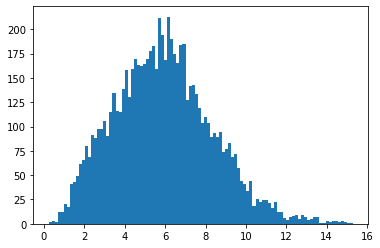

In [28]:
plt.hist(forecast_1['windSpeed (m/s)'], bins=100)
plt.show()

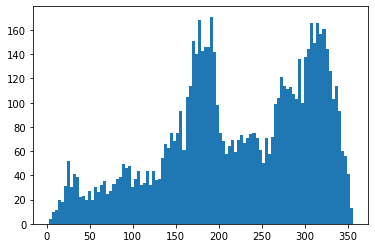

In [29]:
plt.hist(forecast_1['windDic (degree)'], bins=100)
plt.show()

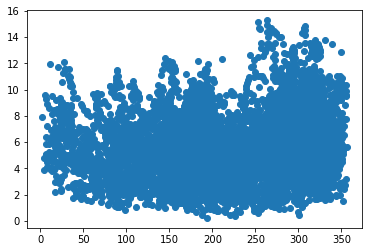

In [39]:
plt.scatter(forecast_1['windDic (degree)'], forecast_1['windSpeed (m/s)'])
plt.show()

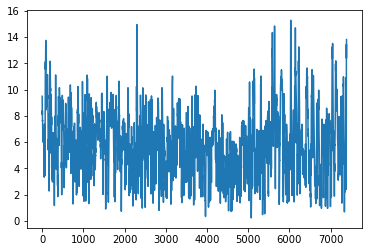

In [31]:
plt.plot(forecast_1['windSpeed (m/s)'])
plt.show()

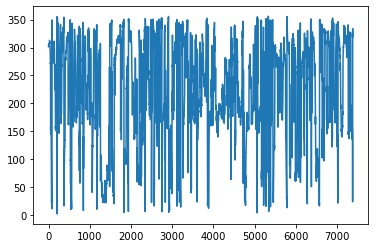

In [32]:
plt.plot(forecast_1['windDic (degree)'])
plt.show()

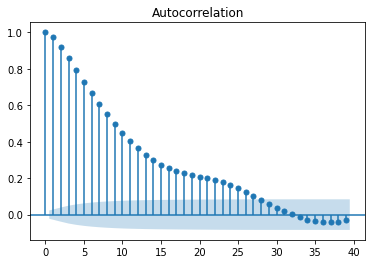

In [34]:
plot_acf(forecast_1['windSpeed (m/s)'])
plt.show()

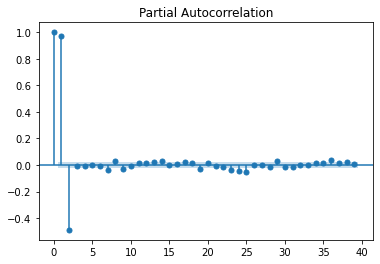

In [36]:
plot_pacf(forecast_1['windSpeed (m/s)'])
plt.show()

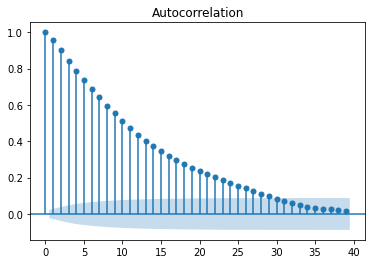

In [37]:
plot_acf(forecast_1['windDic (degree)'])
plt.show()

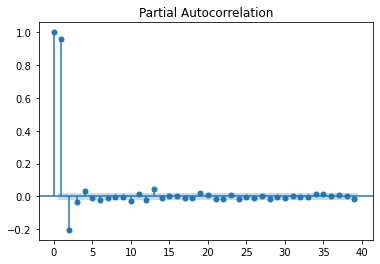

In [38]:
plot_pacf(forecast_1['windDic (degree)'])
plt.show()

In [7]:
forecast_1['month'] = forecast_1['Time'].dt.month
forecast_1['day'] = forecast_1['Time'].dt.day

In [45]:
forecast_1.corr()

,windSpeed (m/s),windDic (degree),month,day
windSpeed (m/s),1.000000,0.195438,-0.055331,0.033138
windDic (degree),0.195438,1.000000,0.044153,0.075478
month,-0.055331,0.044153,1.000000,0.046407
day,0.033138,0.075478,0.046407,1.000000


In [44]:
forecast_1.groupby('month').mean()

,windSpeed (m/s),windDic (degree),day
month,,,
1,6.992116,237.289178,16.535714
2,6.216903,227.473194,14.500000
3,6.821855,167.773654,10.650206
4,5.712578,212.009182,21.243243
5,5.616602,230.705080,16.581738
6,5.462457,219.213973,15.500000
7,5.211323,218.543494,16.000000
8,4.434299,212.754680,16.000000
9,5.837101,184.682713,23.533742


In [46]:
forecast_day = forecast_1.groupby('day').mean().reset_index()

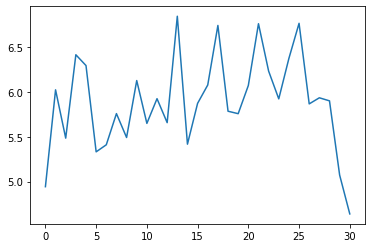

In [48]:
plt.plot(forecast_day['windSpeed (m/s)'])

In [49]:
forecast_day_month = forecast_1.groupby(['month','day']).mean().reset_index()

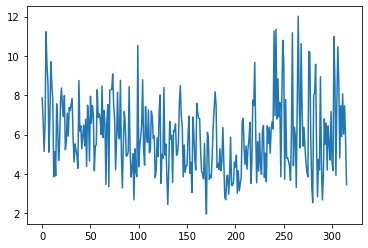

In [50]:
plt.plot(forecast_day_month['windSpeed (m/s)'])

In [54]:
forecast_1['speed_change'] = forecast_1['windSpeed (m/s)'].pct_change()
forecast_1['wind_change'] = forecast_1['windDic (degree)'].pct_change()

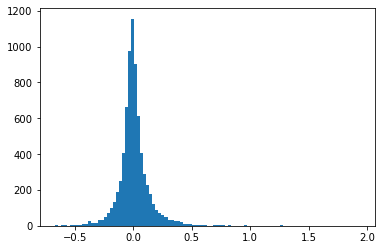

In [55]:
plt.hist(forecast_1['speed_change'], bins=100)
plt.show()

In [8]:
measurement_1['availableMW'] = np.where(measurement_1['availableMW']=='\\N', 
                                        np.nan,
                                        measurement_1['availableMW']
                                       )
measurement_1['windSpeed'] = np.where(measurement_1['windSpeed']=='\\N', 
                                        np.nan,
                                        measurement_1['windSpeed']
                                       )
measurement_1['windPower'] = np.where(measurement_1['windPower']=='\\N', 
                                        np.nan,
                                        measurement_1['windPower']
                                       )

In [9]:
measurement_1['availableMW'] = measurement_1['availableMW'].astype('float')
measurement_1['windSpeed'] = measurement_1['windSpeed'].astype('float')
measurement_1['windPower'] = measurement_1['windPower'].astype('float')

In [10]:
measurement_1.to_csv('processed/Dataset2_measurement_cleaned.csv', index=False)

In [11]:
# Unir bases de datos
forecast_1['hour'] = forecast_1['Time'].dt.hour
forecast_1['year'] = forecast_1['Time'].dt.year
forecast_1['minute'] = forecast_1['Time'].dt.minute

In [12]:
measurement_1['hour'] = measurement_1['timeStamp'].dt.hour
measurement_1['day'] = measurement_1['timeStamp'].dt.day
measurement_1['month'] = measurement_1['timeStamp'].dt.month
measurement_1['year'] = measurement_1['timeStamp'].dt.year
measurement_1['minute'] = measurement_1['timeStamp'].dt.minute

In [13]:
join_df = pd.merge(measurement_1, forecast_1, how='left',
                  on=['year', 'month', 'day', 'hour', 'minute'])

In [14]:
join_df = join_df.drop(columns= ['year', 'month', 'day', 'hour', 'minute'])

In [16]:
#join_df = join_df.drop(columns= ['speed_change', 'wind_change'])

In [17]:
join_df.to_csv('processed/Datasets2_join.csv', index=False)

In [18]:
join_df

,timeStamp,availableMW,windSpeed,windPower,Time,windSpeed (m/s),windDic (degree)
0,2018-12-01 00:00:00,77.4,4.5,3.00625,2018-12-01,2.772180,348.166000
1,2018-12-01 00:05:00,77.4,4.8,5.65763,NaT,NaN,NaN
2,2018-12-01 00:10:00,77.4,4.8,5.65763,NaT,NaN,NaN
3,2018-12-01 00:15:00,77.4,5.0,7.48540,NaT,NaN,NaN
4,2018-12-01 00:20:00,77.4,5.0,7.48540,NaT,NaN,NaN
...,...,...,...,...,...,...,...
8636,2018-12-30 23:40:00,97.2,4.4,2.19283,NaT,NaN,NaN
8637,2018-12-30 23:45:00,97.2,4.8,5.65763,NaT,NaN,NaN
8638,2018-12-30 23:50:00,97.2,4.8,5.65763,NaT,NaN,NaN
8639,2018-12-30 23:55:00,97.2,4.9,6.56988,NaT,NaN,NaN


In [87]:
join_df_hourly = join_df.groupby('Time').mean().reset_index()

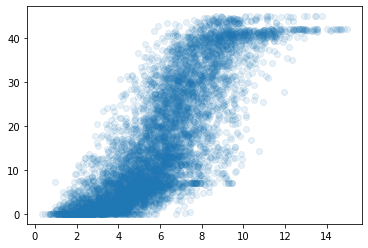

In [92]:
plt.scatter(join_df_hourly['windSpeed (m/s)'], join_df_hourly['windPower'], alpha=.1)
plt.show()

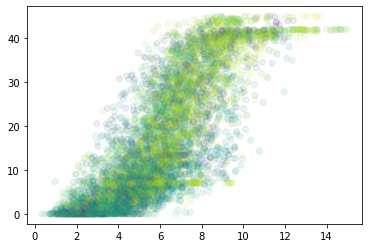

In [104]:
plt.scatter(join_df_hourly['windSpeed (m/s)'], join_df_hourly['windPower'],
            c=join_df_hourly['windDic (degree)'], alpha=.1)
plt.show()

In [110]:
join_df_hourly.describe()

,availableMW,windSpeed,windPower,windSpeed (m/s),windDic (degree)
count,6573.000000,6573.000000,6573.000000,6628.000000,6628.000000
mean,35.467302,7.350140,16.524467,5.929013,221.273125
std,9.963192,2.835569,13.730410,2.395396,87.097345
min,0.000000,0.000000,0.000000,0.341485,2.082125
25%,35.125000,5.300000,4.665448,4.191979,166.423617
50%,39.000000,7.116667,12.547218,5.865519,226.487700
75%,40.875000,9.241667,27.888217,7.472546,301.183312
max,42.000000,16.875000,45.000000,14.960950,355.563750


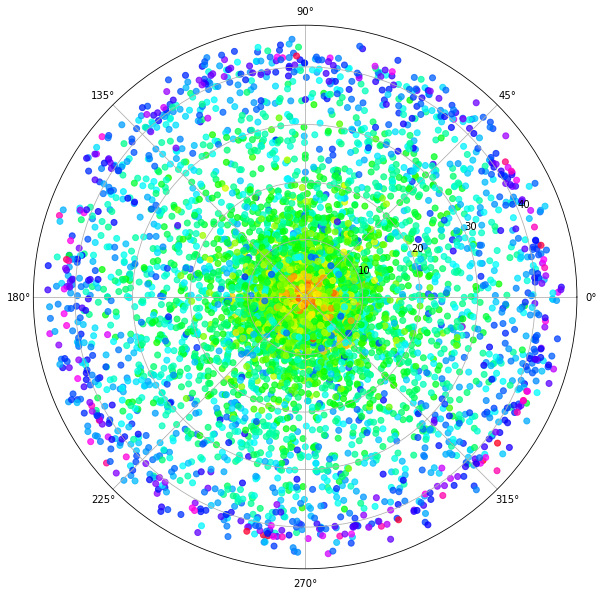

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(join_df_hourly['windDic (degree)'], join_df_hourly['windPower'],
               c=join_df_hourly['windSpeed (m/s)'] , cmap='hsv', alpha=0.75)

In [118]:
join_df_hourly.corr()

,availableMW,windSpeed,windPower,windSpeed (m/s),windDic (degree)
availableMW,1.000000,0.604308,0.477641,0.530687,0.142351
windSpeed,0.604308,1.000000,0.969913,0.845506,0.205718
windPower,0.477641,0.969913,1.000000,0.811350,0.200832
windSpeed (m/s),0.530687,0.845506,0.811350,1.000000,0.192876
windDic (degree),0.142351,0.205718,0.200832,0.192876,1.000000
